In [2]:
%matplotlib inline
import numpy as np
from utilities import *
import matplotlib.pyplot as plt

#Justin's Plot Settings
import seaborn as sns
# This enables high res graphics inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)


# Demonstration on Temporal Event Detector

_Hsiao et al. MSB (http://msb.embopress.org/content/12/5/869)_

The following code will produce figures 2D and 3ABC of the above paper.

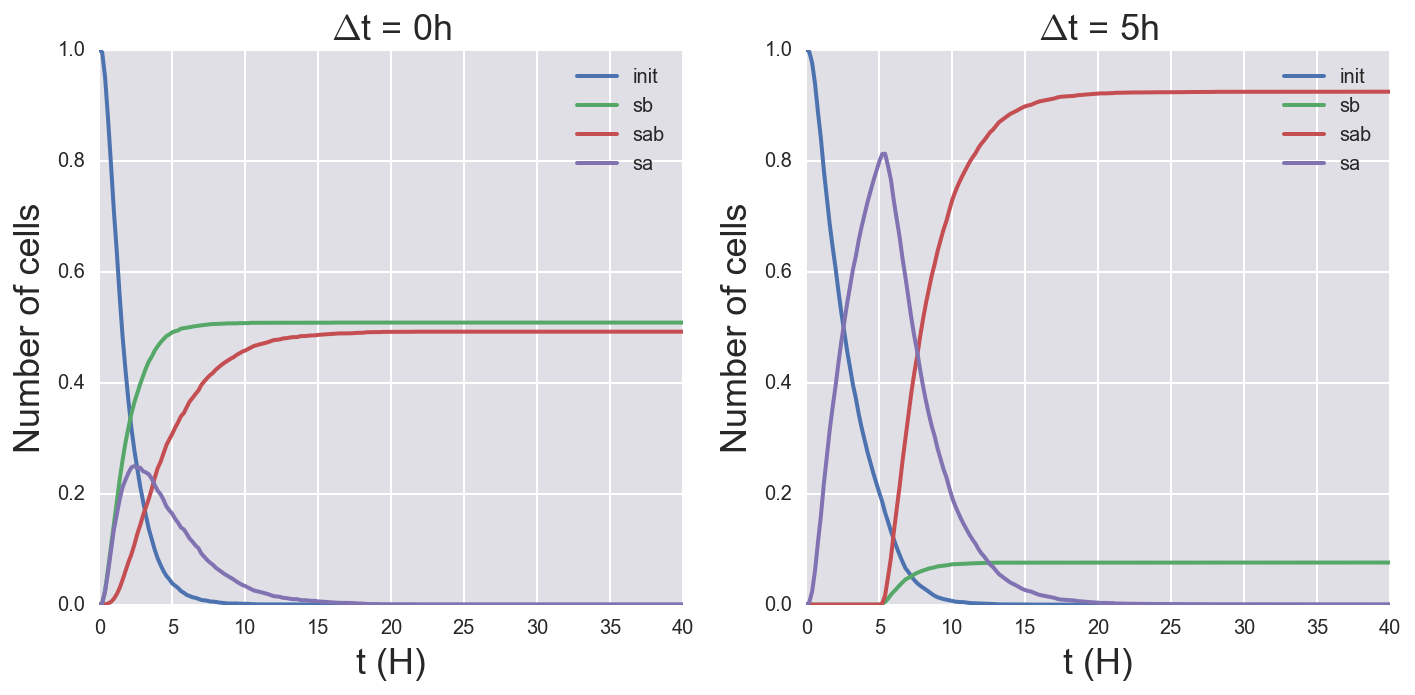

In [3]:
plt.figure(figsize = (10,5))
#Figure 2D (left)
np.random.seed(seed=123456) #seeded RNG
N = 5000 #number of cells
#set up the initial condition of the circuit
victoria = Strand(['RFP','attB-1','TERM','attB-2','attP-1','PConst', \
                   'attP-2','GFP','GENOME'], [-1,1,-1,-1,-1,-1,-1,1,0])
t = np.linspace(0, 40, 201) #set up time
#figure out which strands should I be tracking giving a sequence of inputs
trackStrands = sequences(victoria, {'sa':['1'], 'sab':['1','2'], 'sb':['2']})

#set up inducer times
inducer = {'1':[(0, 100)], '2':[(0,100)]}
#run the simulation
outstrand, outgene = parallel_wrapper(victoria, inducer, N, trackStrands, [],\
                                      t, proc = 10)
#plot results for all tracked strands
plt.subplot(1,2,1)
for i, ts in outstrand.items(): plt.plot(t, ts/N, label=i)
plt.legend()
plt.title('$\Delta$t = 0h'); plt.xlabel('t (H)'); plt.ylabel('Number of cells')

#same as the previous set
inducer = {'1':[(0,100)], '2':[(5, 100)]}
outstrand, outgene = parallel_wrapper(victoria, inducer, N, trackStrands, [],\
                                      t, proc = 10)
plt.subplot(1,2,2)
for i, ts in outstrand.items(): plt.plot(t, ts/N, label=i)
plt.legend()
plt.title('$\Delta$t = 5h'); plt.xlabel('t (H)'); plt.ylabel('Number of cells')
plt.tight_layout()
plt.show()

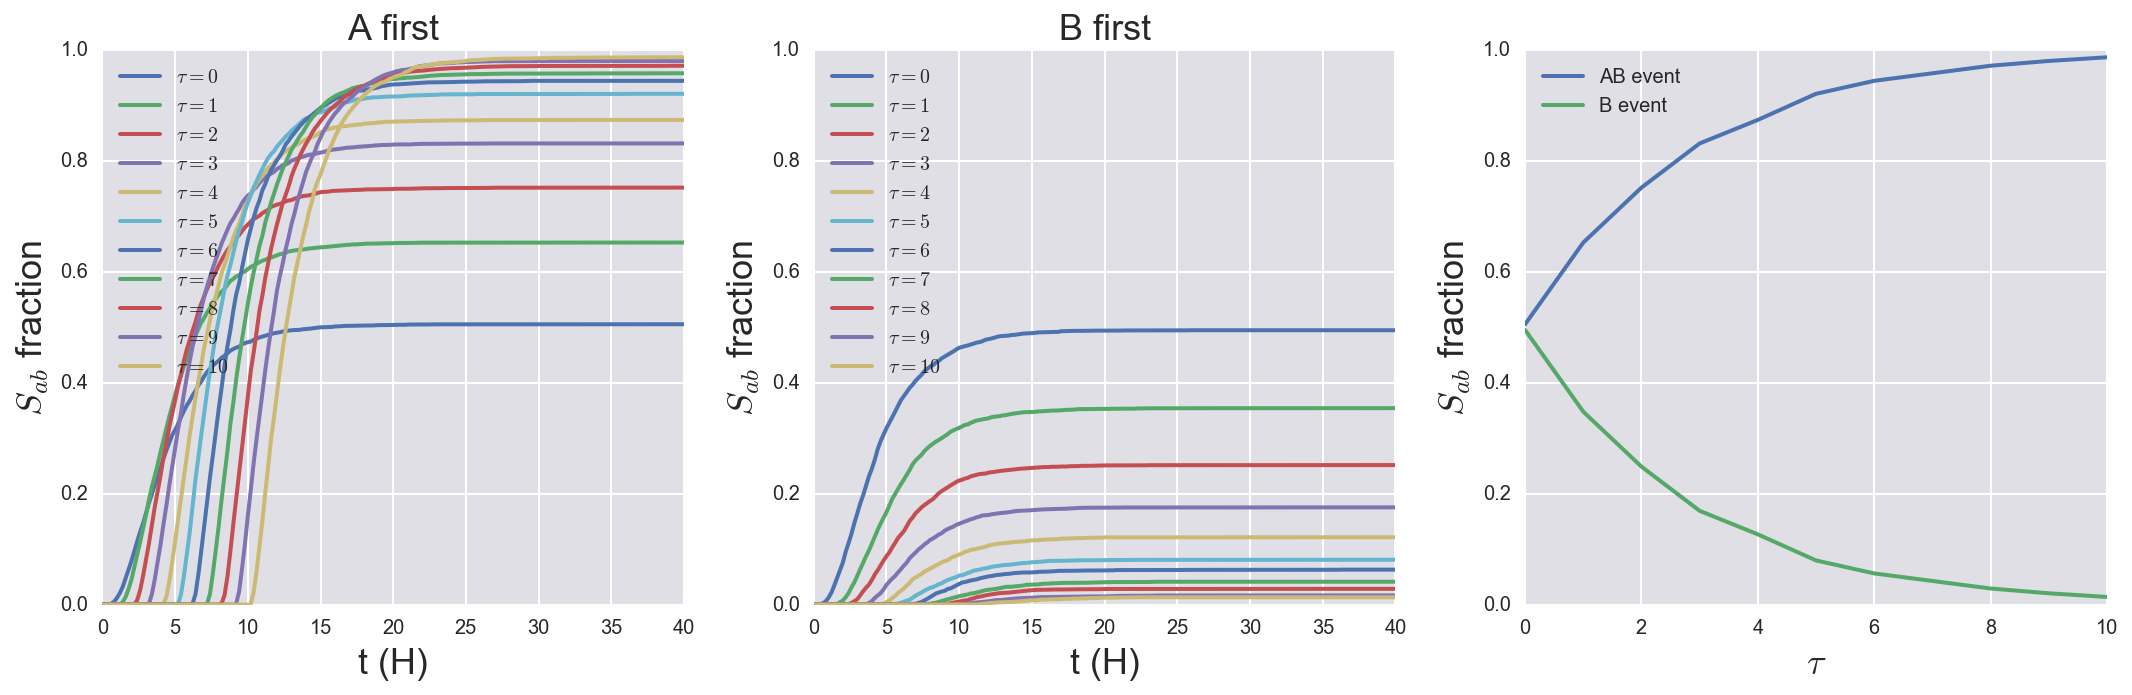

In [6]:
np.random.seed(seed=123456) #Seeded RNG
taus = [0,1,2,3,4,5,6,7,8,9,10]; #different delta ts
#sab and sb is for figure 3c, abts is for figure 3a, bats is for figure 3b
data = {'sab':[],'sb':[],'abts':{},'bats':{}} #empty data structure

for tau in taus:
    #inducer setup for a first and b first
    inducerab = {'1':[(0, 100)], '2':[(tau, 100)]}
    inducerba = {'2':[(0, 100)], '1':[(tau, 100)]}
    #do the simulations
    osab, og = parallel_wrapper(victoria, inducerab, N, trackStrands, [], \
                                t, proc = 10)
    osba, og = parallel_wrapper(victoria, inducerba, N, trackStrands, [], \
                                t, proc = 10)
    #load results into data strcture
    #abts and bats is for a-then-b and b-then-a timeseries plot
    #sab and sb are the ratios of the states Sab and Sb at steady state
    data['sab'].append(osab['sab'][-1]/N)
    data['sb'].append(osab['sb'][-1]/N)
    data['abts'].update({tau:osab['sab']/N})
    data['bats'].update({tau:osba['sab']/N})

#Plot away
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for tau in taus:
    plt.plot(t, data['abts'][tau], label=r'$\tau=' + str(tau) + '$')
plt.legend(loc='upper left'); plt.title('A first'); plt.ylim([0, 1])
plt.xlabel('t (H)'); plt.ylabel(r'$S_{ab}$ fraction')
plt.subplot(1,3,2)
for tau in taus:
    plt.plot(t, data['bats'][tau], label=r'$\tau=' + str(tau) + '$')
plt.legend(loc='upper left'); plt.title('B first'); plt.ylim([0, 1])
plt.xlabel('t (H)'); plt.ylabel(r'$S_{ab}$ fraction')
plt.subplot(1,3,3)
plt.plot(taus, data['sab'], label='AB event')
plt.plot(taus, data['sb'], label='B event')
plt.legend(loc = 'upper left'); plt.xlabel(r'$\tau$');
plt.ylabel(r'$S_{ab}$ fraction'); plt.ylim([0, 1])
plt.tight_layout()
plt.show()